In [1]:
Ns=10
Nn = 3
σ=0.1
maxRange = 2

In [2]:
import time

print("Importing libraries...",end='')
t0 = time.time()

from numpy import sqrt,pi,exp,zeros,linspace,trapz
import matplotlib.pyplot as plt
from math import erfc

D=1/Ns

print("DONE in %0.3f [ms]"%(1000*(time.time()-t0)))

Importing libraries...DONE in 200.315 [ms]


Generating single-particle orbitals...DONE in 11.565 [ms]


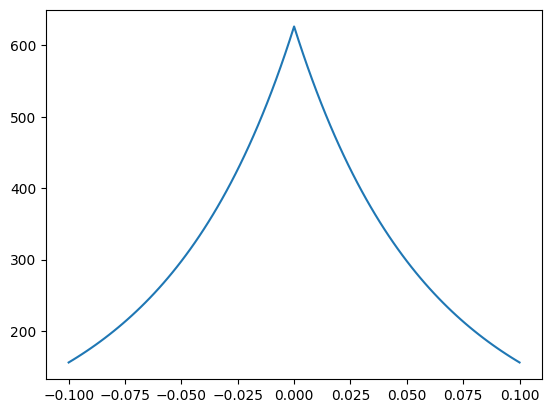

In [11]:
print("Generating single-particle orbitals...",end='')
t0 = time.time()

g = {}

# for j in range(-10,11):
#     g[j,0] = lambda x: 1/sqrt(D)
#     g[j,1] = lambda x: sqrt(3/D)*(2*x/D-1-2*j)
#     g[j,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D-1-2*j)**2-1)

g[-2,0] = lambda x: 1/sqrt(D)
g[-2,1] = lambda x: sqrt(3/D)*(2*x/D+3)
g[-2,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D+3)**2-1)

g[-1,0] = lambda x: 1/sqrt(D)
g[-1,1] = lambda x: sqrt(3/D)*(2*x/D+1)
g[-1,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D+1)**2-1)

g[0,0] = lambda x: 1/sqrt(D)
g[0,1] = lambda x: sqrt(3/D)*(2*x/D-1)
g[0,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D-1)**2-1)

g[1,0] = lambda x: 1/sqrt(D)
g[1,1] = lambda x: sqrt(3/D)*(2*x/D-3)
g[1,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D-3)**2-1)

g[2,0] = lambda x: 1/sqrt(D)
g[2,1] = lambda x: sqrt(3/D)*(2*x/D-5)
g[2,2] = lambda x: sqrt(5/4/D)*(3*(2*x/D-5)**2-1)


def vsdd(r):
    return 0.25*(-2*abs(r/σ)+sqrt(2*pi)*(1+(r/σ)**2)*exp((r/σ)**2/2)*erfc(abs(r/σ)/sqrt(2)))/σ


def func(x,xp,n,np,npp,nppp):
    if xp>-4*D and xp<=-3*D:
        jp=-2
    if xp>-3*D and xp<=-2*D:
        jp=-2
    if xp>-2*D and xp<=-D:
        jp=-2
    if xp>-D and xp<=0:
        jp=-1
    if xp>0 and xp<=D:
        jp=0
    elif xp>D and xp<=2*D:
        jp=1
    elif xp>2*D and xp<=3*D:
        jp=2
    elif xp>3*D and xp<=4*D:
        jp=3
    elif xp>4*D and xp<=5*D:
        jp=4
   # print(jp)
    return g[0,n](x)*g[jp,np](xp)*vsdd(x-xp)*g[jp,npp](xp)*g[0,nppp](x)
    
    
rs = linspace(-D,D,101)
vs = []
for r in rs:
    vs.append(vsdd(r)/D**2)
plt.plot(rs,vs)
#print(func(0.1*D,0.2*D,0,0,0,1))
print("DONE in %0.3f [ms]"%(1000*(time.time()-t0)))

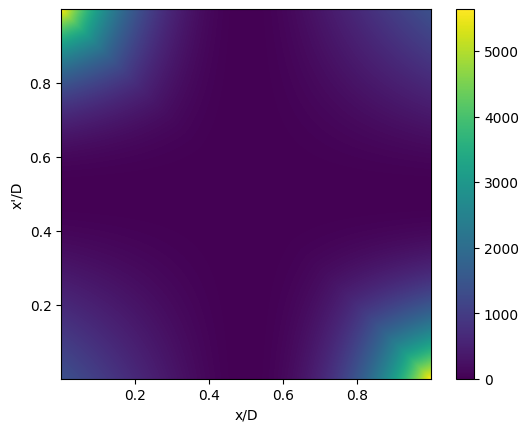

3.7506354812386813


In [23]:
INs = 801
funcs = {}
def getElem(jp,n,np,npp,nppp):

    x = linspace(1e-7,D-1e-7,INs)
    xp = linspace(jp*D+1e-7,(jp+1)*D-1e-7,INs)
    funcs = zeros((INs,INs),dtype=float)

    for i in range(INs):
        for ip in range(INs):
            funcs[i,ip] = func(x[i],xp[ip],n,np,npp,nppp)
            
    plt.imshow(funcs,extent=(x[0]/D,x[-1]/D,xp[0]/D,xp[-1]/D))
    plt.xlabel('x/D')
    plt.ylabel('x\'/D')
    plt.colorbar()
    plt.show()
    return trapz(trapz(funcs,dx=D/INs),dx=D/INs)

print(getElem(0,1,1,1,1))
#print(trapz(trapz(funcs,dx=D/INs),dx=D/INs))

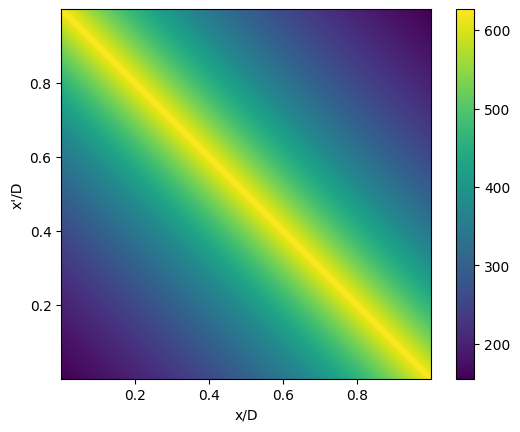

0 0 0 0 0 -> 4.013616869764499


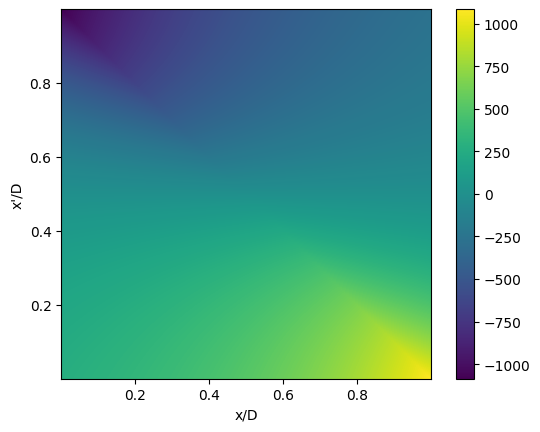

0 0 0 0 1 -> -6.661338147750939e-16


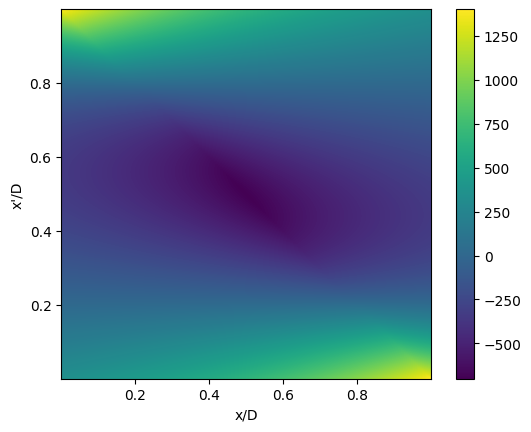

0 0 0 0 2 -> -0.32502084915230944


KeyboardInterrupt: 

In [15]:
#file = open("./elems/Udd_Ns%i_Nn%i_sigma%.3f"%(Ns,Nn,σ),'w')
for jp in range(0,1):
    for n in range(0,Nn):
        for np in range(0,Nn):
            for npp in range(np,Nn):
                for nppp in range(n,Nn):
                    elem = getElem(jp,n,np,npp,nppp)
                    #file.write("%i %i %i %i %i %f\n"%(jp,n,np,npp,nppp,elem))
                    print(jp,n,np,npp,nppp,'->',elem)
#file.close()